In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')


from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
#Reading only the 2009-2010 dataset
df = pd.read_excel("online_retail_II.xlsx",sheet_name =0)
df.head(9)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom


In [3]:
df.tail(9)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525452,538171,22745,POPPY'S PLAYHOUSE BEDROOM,2,2010-12-09 20:01:00,2.10,17530.0,United Kingdom
525453,538171,22558,CLOTHES PEGS RETROSPOT PACK 24,4,2010-12-09 20:01:00,1.49,17530.0,United Kingdom
525454,538171,21671,RED SPOT CERAMIC DRAWER KNOB,6,2010-12-09 20:01:00,1.25,17530.0,United Kingdom
525455,538171,20971,PINK BLUE FELT CRAFT TRINKET BOX,2,2010-12-09 20:01:00,1.25,17530.0,United Kingdom
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
#checking for null values
print("Nulls")
print("========")
print(df.isnull().sum())

Nulls
Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [6]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [7]:
#including object data
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [8]:
#Displaying the null values in customerID
df[df["Customer ID"].isna()].head(9)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom


In [9]:
#viewing negative quantities
df[df['Quantity'] < 0].head(9)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.0,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


In [10]:
#Checking if all the invoice numbers begin with C
#Setting invoice to a string in order to use Regex
df["Invoice"] = df["Invoice"].astype('str')
#validating pattern of invoice numbers by building a regex expression
df[df['Invoice'].str.match('^\\d{6}$')==False] #matching exactly a 6-digit number




,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [11]:
#Checking if C is the only unique letter that appears before an invoice number
df["Invoice"].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [12]:
#Checking for invoices that start with A
df[df["Invoice"].str.startswith('A')]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [13]:
#Checking if stock code in data contains exactly 5 digit numbers
df['StockCode'] = df['StockCode'].astype('str')
df[df['StockCode'].str.match('^\\d{5}$')==False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.0,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [14]:
#Checking if I can get any other results other than 5 digits followed by letters

df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()


array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [15]:
#Pattern matching
df[df['StockCode'].str.contains('POST')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany
927,C489538,POST,POSTAGE,-1,2009-12-01 12:18:00,9.58,15796.0,United Kingdom
...,...,...,...,...,...,...,...,...
522916,537967,POST,POSTAGE,1,2010-12-09 11:31:00,18.00,12494.0,France
522930,537995,POST,POSTAGE,2,2010-12-09 11:39:00,18.00,12712.0,Germany
522974,538003,POST,POSTAGE,8,2010-12-09 12:05:00,18.00,12429.0,Denmark
523064,538008,POST,POSTAGE,5,2010-12-09 12:17:00,18.00,12683.0,France


In [16]:
df[df['StockCode'].str.contains('D')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
197,C489459,90200D,PINK SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom
204,C489459,90003D,CRYSTAL PAIR HEART HAIR SLIDES,-3,2009-12-01 10:44:00,3.75,17592.0,United Kingdom
208,C489459,90082D,DIAMANTE BOW BROOCH BLACK COLOUR,-2,2009-12-01 10:44:00,6.35,17592.0,United Kingdom
244,489462,90200D,PINK SWEETHEART BRACELET,3,2009-12-01 10:49:00,4.25,17592.0,United Kingdom
258,489462,90003D,CRYSTAL PAIR HEART HAIR SLIDES,3,2009-12-01 10:49:00,3.75,17592.0,United Kingdom
...,...,...,...,...,...,...,...,...
525147,538154,DOT,DOTCOM POSTAGE,1,2010-12-09 16:35:00,85.79,NaN,United Kingdom
525148,538155,84849D,HOT BATHS SOAP HOLDER,1,2010-12-09 16:52:00,1.69,16907.0,United Kingdom
525201,538156,17107D,"FLOWER FAIRY,5 SUMMER B'DRAW LINERS",10,2010-12-09 16:53:00,2.55,15555.0,United Kingdom
525325,538167,47591D,PINK FAIRY CAKE CHILDRENS APRON,2,2010-12-09 18:58:00,1.95,14713.0,United Kingdom


In [17]:
df[df['StockCode'].str.contains('DOT')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [18]:
df[df['StockCode'].str.contains('AMAZONFEE')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
440688,C531400,AMAZONFEE,AMAZON FEE,-1,2010-11-08 10:08:00,6706.71,NaN,United Kingdom
440698,531411,AMAZONFEE,AMAZON FEE,1,2010-11-08 10:11:00,6706.71,NaN,United Kingdom
517452,C537600,AMAZONFEE,AMAZON FEE,-1,2010-12-07 12:41:00,1.00,NaN,United Kingdom
517953,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom
517955,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
519170,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom
519251,C537647,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:41:00,5519.25,NaN,United Kingdom
519294,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom
519295,C537652,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:51:00,6706.71,NaN,United Kingdom


# Observations
## StockCode
From the data,StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. 
The 'StockCode' column is intended to follow a specific pattern of five digits ([0-9]{5}), but it appears to contain legitimate values that extend this pattern. These extended values include five digits followed by a single letter, either uppercase or lowercase ([0-9]{5}[a-zA-Z]).


* DCGS: Looks valid, some quantities are negative though and customer ID is null – Omit from clustering.
* D: Looks valid, represents discount values – Omit from clustering.
* DOT: Looks valid, represents postage charges – Omit from clustering.
* M or m: Looks valid, represents manual transactions – Omit from clustering.
* C2: Carriage transaction, not sure what this means – Omit from clustering.
* C3: Not sure, only 1 transaction – Omit.
* BANK CHARGES or B: Bank charges – Omit from clustering.
* S: Samples sent to customer – Omit from clustering.
* TESTXXX: Testing data, not valid – Omit from clustering.
* gift__XXX: Purchases with gift cards, might be interesting for another analysis, but no customer data – Omit.
* PADS: Looks like a legit stock code for padding – Include.
* SP1002: Looks like a special request item, only 2 transactions, 3 look legit, 1 has 0 pricing – Omit for now.
* AMAZONFEE: Looks like fees for Amazon shipping or something – Omit for now.
* ADJUSTX: Looks like manual account adjustments by admins – Omit for now



# Cleaning the Data

In [19]:
cleaned_df = df.copy()

In [20]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")

mask = (
    cleaned_df["Invoice"].str.match("^\\d{6}$") == True
)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [21]:
#Doing the same for Stockcodes
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True)
    | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (cleaned_df["StockCode"].str.match("^PADS$") == True)
)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [22]:
cleaned_df.dropna(subset=['Customer ID'], inplace = True)

In [23]:
#checking the cleaned dataset
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.000000,406337,406337.000000,406337.000000
mean,13.619099,2010-07-01 10:11:06.543288320,2.991462,15373.632992
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14004.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,97.000659,NaN,4.285876,1677.365907


In [24]:
#checking for prices at 0
cleaned_df[cleaned_df['Price'] == 0.00]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658.0,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.0,15070.0,United Kingdom
40101,492760,21143,ANTIQUE GLASS HEART DECORATION,12,2009-12-18 14:22:00,0.0,18071.0,United Kingdom
47126,493761,79320,FLAMINGO LIGHTS,24,2010-01-06 14:54:00,0.0,14258.0,United Kingdom
48342,493899,22355,"CHARLOTTE BAG , SUKI DESIGN",10,2010-01-08 10:43:00,0.0,12417.0,Belgium
57619,494607,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-15 12:43:00,0.0,16858.0,United Kingdom
111348,500073,21662,VINTAGE GLASS COFFEE CADDY,1,2010-03-04 11:44:00,0.0,13047.0,United Kingdom


In [25]:
len(cleaned_df[cleaned_df['Price'] == 0.00])

28

In [26]:
#fliltering out 0 prices
cleaned_df = cleaned_df[cleaned_df['Price'] > 0.00]


In [27]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.000000,406309,406309.000000,406309.000000
mean,13.617924,2010-07-01 10:14:25.869572352,2.991668,15373.722268
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14006.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,96.998833,NaN,4.285951,1677.329470


In [28]:
#Checking amount of lost data due to cleaning
len(cleaned_df)/len(df)


0.7732429238325965

- A 23% reduction in records occurred during the cleaning process.

# Feature Engineering

In [29]:
#computing the total amount spent on a particular transaction line
cleaned_df["TotalSalesline"] = cleaned_df["Quantity"] * cleaned_df["Price"]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSalesline
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


In [30]:
#Aggregating data by grouping by our customer ID
#Computing the aggrregating by recency, frequency and monetary value(RFM analysis)
aggregated_df = cleaned_df.groupby(by="Customer ID", as_index=False) \
    .agg(
        MonetaryValue=("TotalSalesline", "sum"),
        Frequency=("Invoice", "nunique"),
        LastInvoiceDate=("InvoiceDate", "max")
    )

aggregated_df.head(7)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.0,169.36,2,2010-06-28 13:53:00
1,12347.0,1323.32,2,2010-12-07 14:57:00
2,12348.0,221.16,1,2010-09-27 14:59:00
3,12349.0,2221.14,2,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00
5,12352.0,343.80,2,2010-11-29 10:07:00
6,12353.0,317.76,1,2010-10-27 12:44:00


In [31]:
#Getting a date to base recency feature
max_invoice_date = aggregated_df['LastInvoiceDate'].max()

max_invoice_date

Timestamp('2010-12-09 20:01:00')

In [32]:
aggregated_df['Recency'] = (max_invoice_date-aggregated_df['LastInvoiceDate']).dt.days
aggregated_df.head(7)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.0,169.36,2,2010-06-28 13:53:00,164
1,12347.0,1323.32,2,2010-12-07 14:57:00,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73
3,12349.0,2221.14,2,2010-10-28 08:23:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10
5,12352.0,343.80,2,2010-11-29 10:07:00,10
6,12353.0,317.76,1,2010-10-27 12:44:00,43


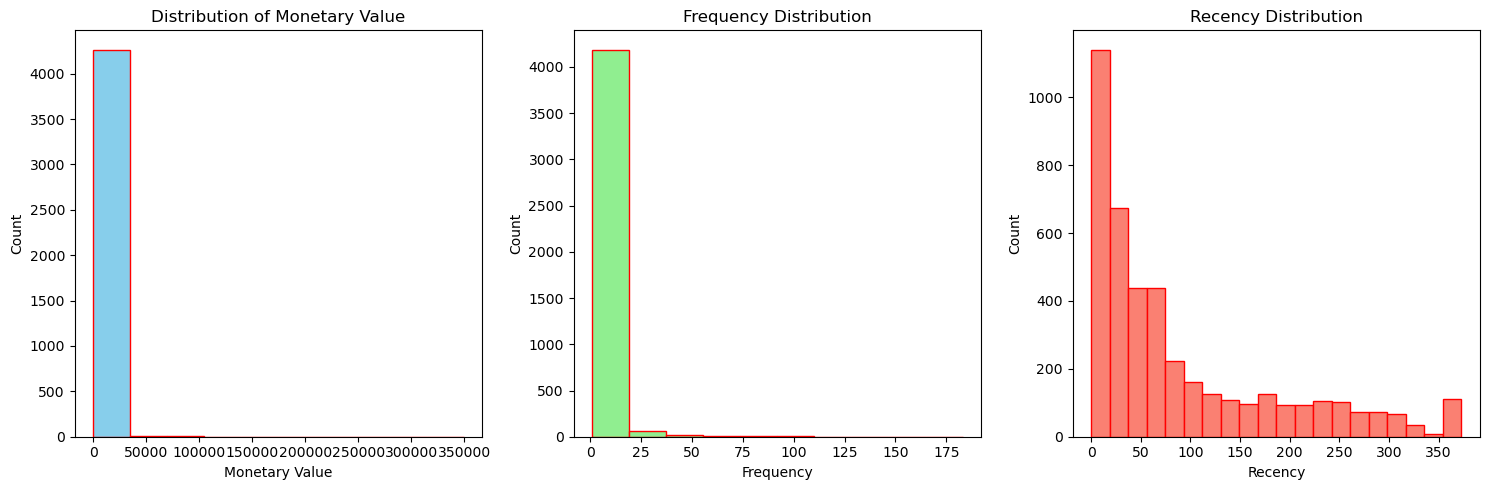

In [33]:
#Plotting distribution of features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='red')
plt.title('Distribution of Monetary Value')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='red')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['Recency'], bins=20, color='salmon', edgecolor='red')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

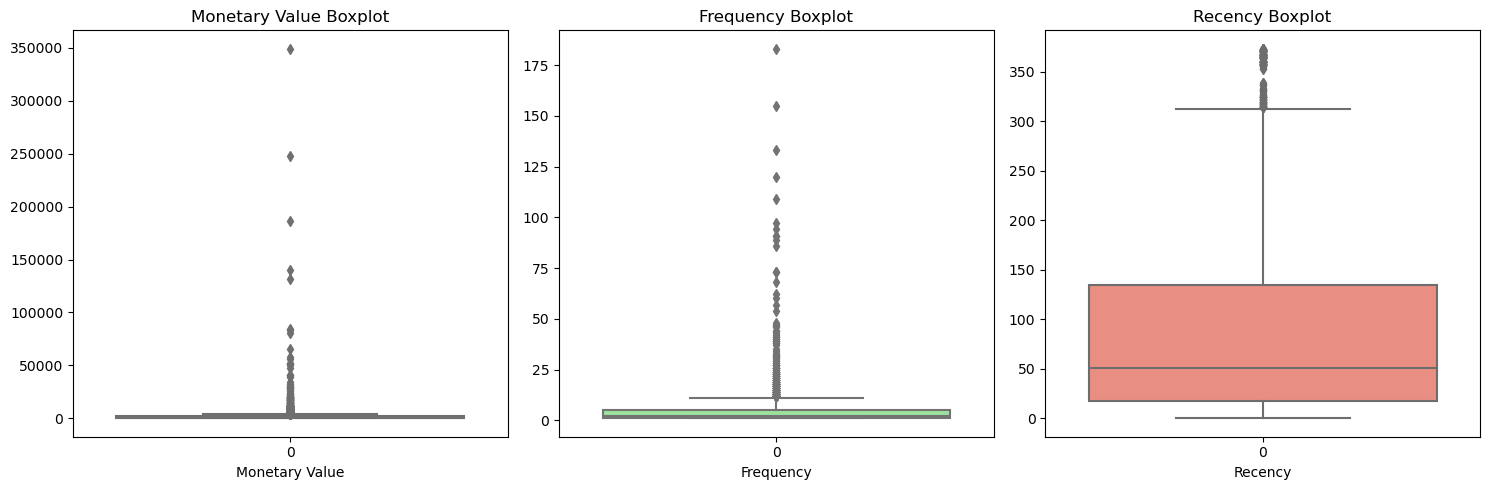

In [34]:
#Displaying distribution on a box plot to visualize outliers

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sn.boxplot(data=aggregated_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sn.boxplot(data=aggregated_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sn.boxplot(data=aggregated_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

Separating the outlier data and use the remaining data for our clustering


In [35]:
# M= Monetary value
# Q1,Q3,Q3 = Quartile 1, Quartile 2, InterQuartile Range
###
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))].copy()

monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.000000,423.000000,423.000000,423,423.000000
mean,15103.040189,12188.101740,17.167849,2010-11-09 12:26:02.978723328,30.035461
min,12357.000000,3802.040000,1.000000,2009-12-10 18:03:00,0.000000
25%,13622.000000,4605.940000,8.000000,2010-11-08 13:17:30,3.000000
50%,14961.000000,6191.320000,12.000000,2010-11-26 12:19:00,13.000000
75%,16692.000000,10273.235000,18.000000,2010-12-06 10:34:30,31.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,364.000000
std,1728.661406,25830.851045,19.729755,NaN,51.541004


In [36]:
#getting outliers for frequency values
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_df['Frequency'] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.000000,279.000000,279.000000,279,279.000000
mean,15352.655914,14409.714932,23.810036,2010-11-23 11:06:20.645161216,16.089606
min,12437.000000,1094.390000,12.000000,2010-05-12 16:51:00,0.000000
25%,13800.000000,4331.560500,13.000000,2010-11-20 13:14:30,2.000000
50%,15465.000000,6615.770000,17.000000,2010-12-02 10:46:00,7.000000
75%,16828.500000,11692.405000,23.000000,2010-12-07 11:08:30,19.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,211.000000
std,1748.429987,31381.736785,21.932937,NaN,26.589117


In [37]:
#getting values which are not outliers 

non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.000000,3809.000000,3809.000000,3809,3809.000000
mean,15376.482804,885.502197,2.863481,2010-09-03 11:16:46.516146176,97.082174
min,12346.000000,1.550000,1.000000,2009-12-01 10:49:00,0.000000
25%,13912.000000,279.910000,1.000000,2010-07-08 14:48:00,22.000000
50%,15389.000000,588.050000,2.000000,2010-10-12 16:25:00,58.000000
75%,16854.000000,1269.050000,4.000000,2010-11-17 13:14:00,154.000000
max,18287.000000,3788.210000,11.000000,2010-12-09 20:01:00,373.000000
std,1693.199806,817.672283,2.243748,NaN,98.111495


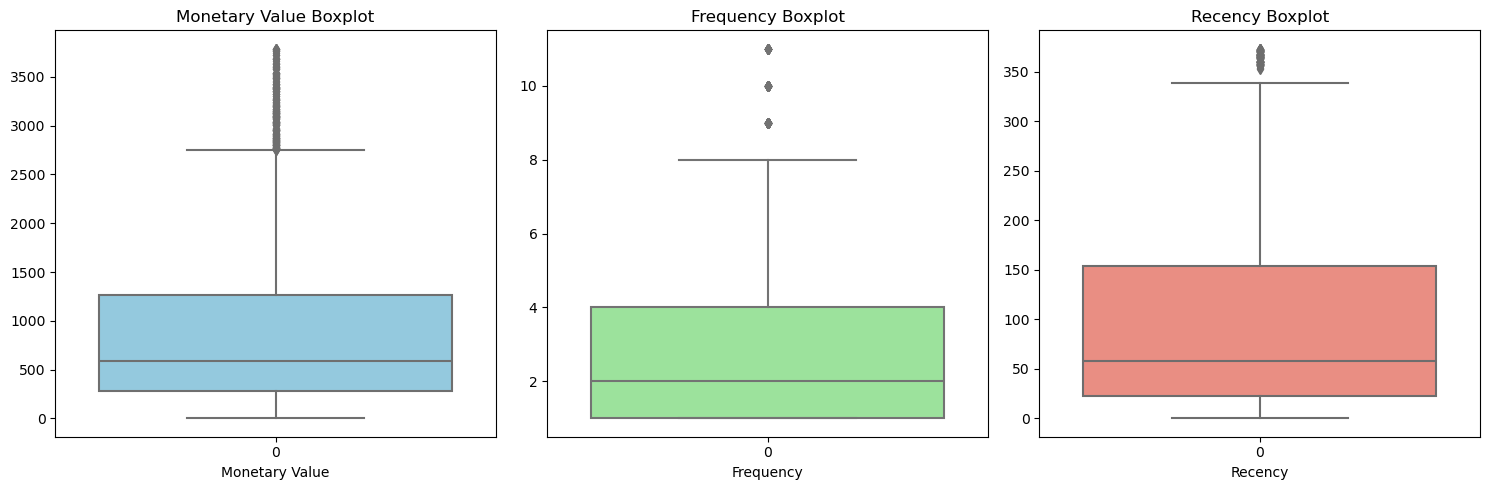

In [38]:
#validating our non outliers by replotting box plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sn.boxplot(data=non_outliers_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sn.boxplot(data=non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sn.boxplot(data=non_outliers_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

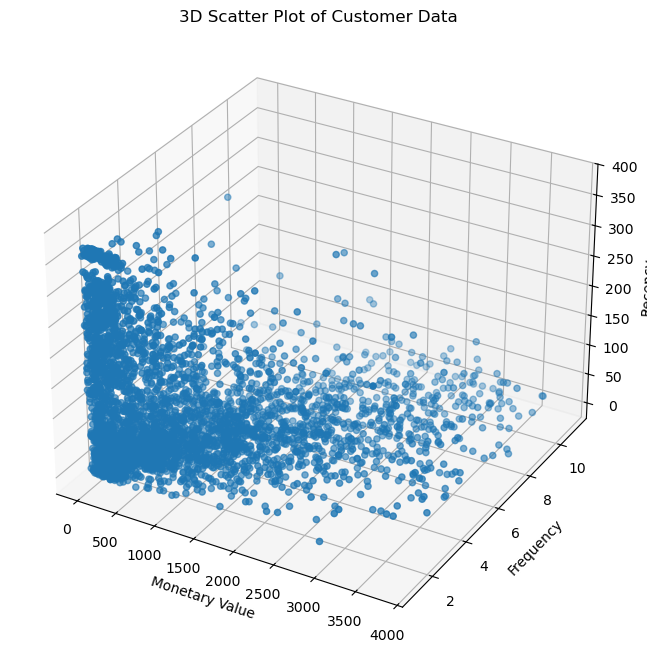

In [39]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

# Scaling the dataset

In [40]:
from sklearn.preprocessing import StandardScaler


scalar = StandardScaler()
scaled_df = scalar.fit_transform(non_outliers_df[['MonetaryValue','Frequency','Recency']])
scaled_df

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [41]:
# Converting the arrat above to a dataframe
scaled_data_df = pd.DataFrame(scaled_df, index=non_outliers_df.index, columns=("MonetaryValue", "Frequency", "Recency"))

scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.875945,-0.384889,0.682149
1,0.535514,-0.384889,-0.969251
2,-0.812586,-0.830631,-0.245489
3,1.633678,-0.384889,-0.561498
4,-0.715016,-0.830631,-0.887700
...,...,...,...
4280,-0.298120,1.398076,-0.816344
4281,-0.579553,-0.830631,-0.316846
4282,-0.621972,-0.830631,2.017539
4283,0.441467,-0.384889,0.141876


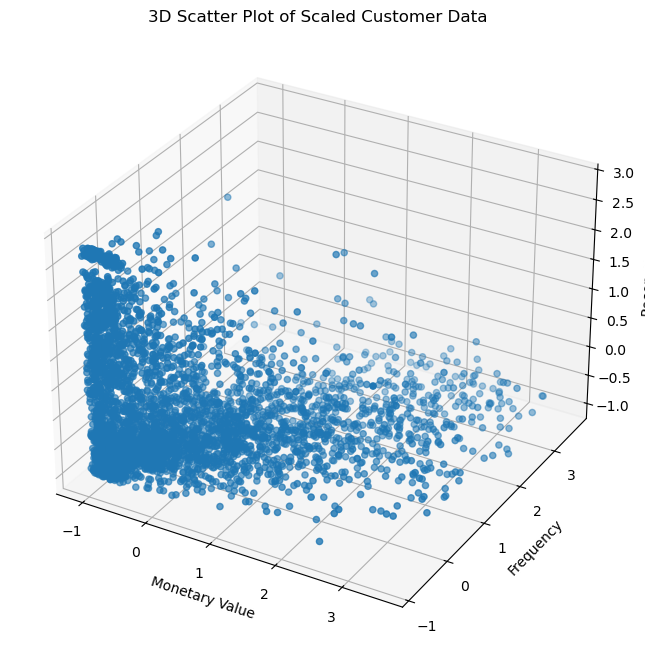

In [42]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Scaled Customer Data')

plt.show()

# KMeans Clustering
## Identifying the optimum number of clusters using the elbow method and Silhouette score


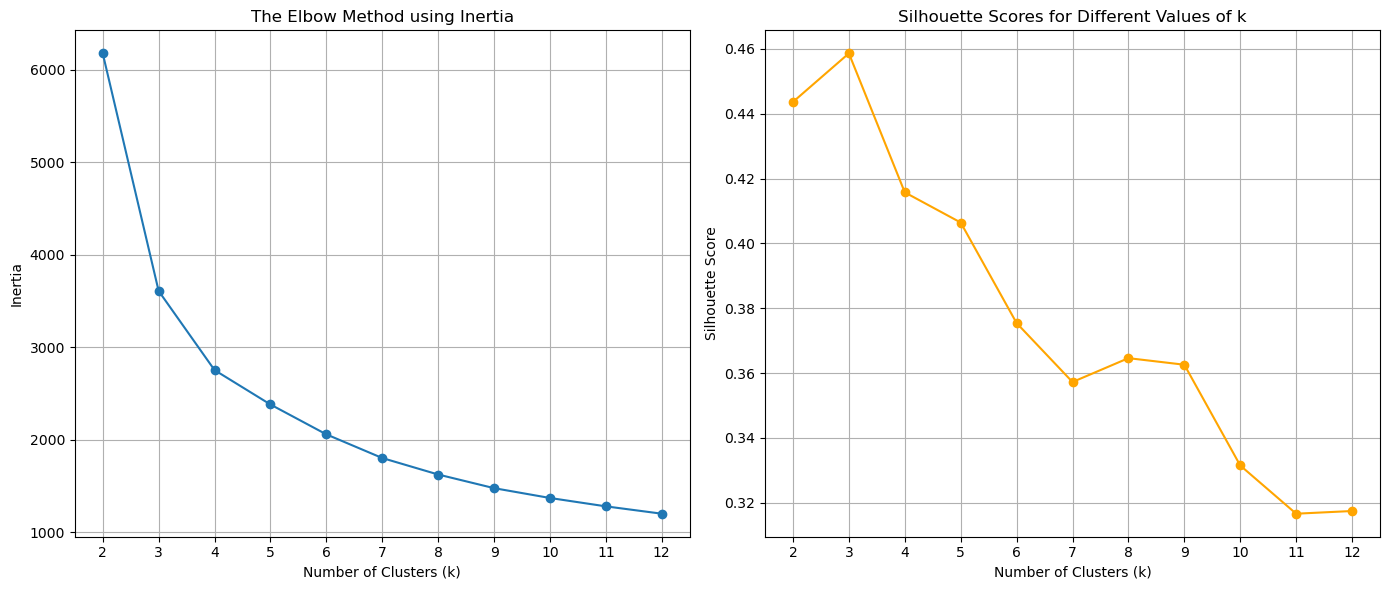

In [43]:
# Creating a function to to work out the optimum number of clusters
from sklearn.metrics import silhouette_score

max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state= 42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('The Elbow Method using Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

Optimum elbow line between k= 4 and 5,
k = 4 has a higher silhouette score than k= 5 and hence,
Optimum value of k = 5

# Model Building

In [44]:
kmeans = KMeans(n_clusters=4, random_state = 42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([0, 3, 2, ..., 0, 3, 3])

In [45]:
#adding cluster labels to our original data
non_outliers_df['Cluster'] = cluster_labels
non_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,0
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,3
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,3
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.0,641.77,6,2010-11-22 15:30:00,17,3
4281,18284.0,411.68,1,2010-10-04 11:33:00,66,2
4282,18285.0,377.00,1,2010-02-17 10:24:00,295,0
4283,18286.0,1246.43,2,2010-08-20 11:57:00,111,3


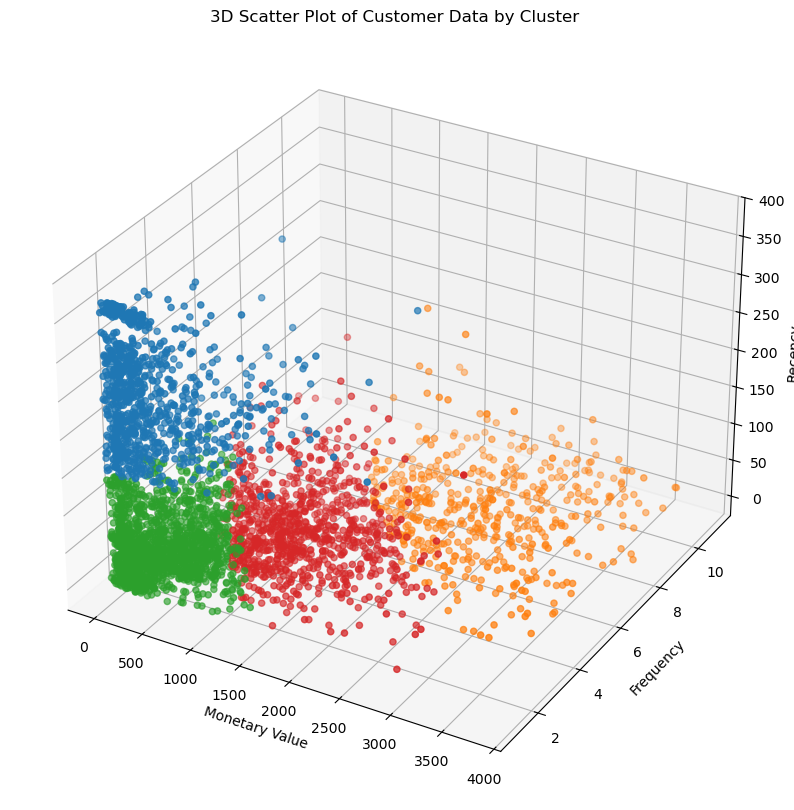

In [46]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'], 
                     non_outliers_df['Frequency'], 
                     non_outliers_df['Recency'], 
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

In [47]:
print(non_outliers_df['Cluster'].value_counts())
print(cluster_colors)

Cluster
2    1498
3     914
0     902
1     495
Name: count, dtype: int64
{0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c', 3: '#d62728'}


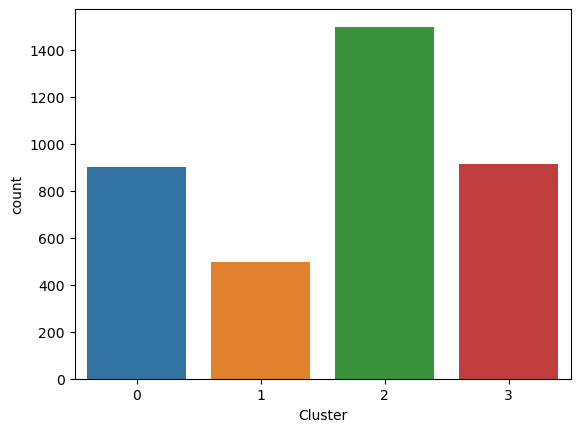

In [48]:
#visualizing counts of clusters
sn.countplot(x = 'Cluster', data = non_outliers_df);


In [49]:
print(non_outliers_df['Cluster'].value_counts())
print(cluster_colors)

Cluster
2    1498
3     914
0     902
1     495
Name: count, dtype: int64
{0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c', 3: '#d62728'}


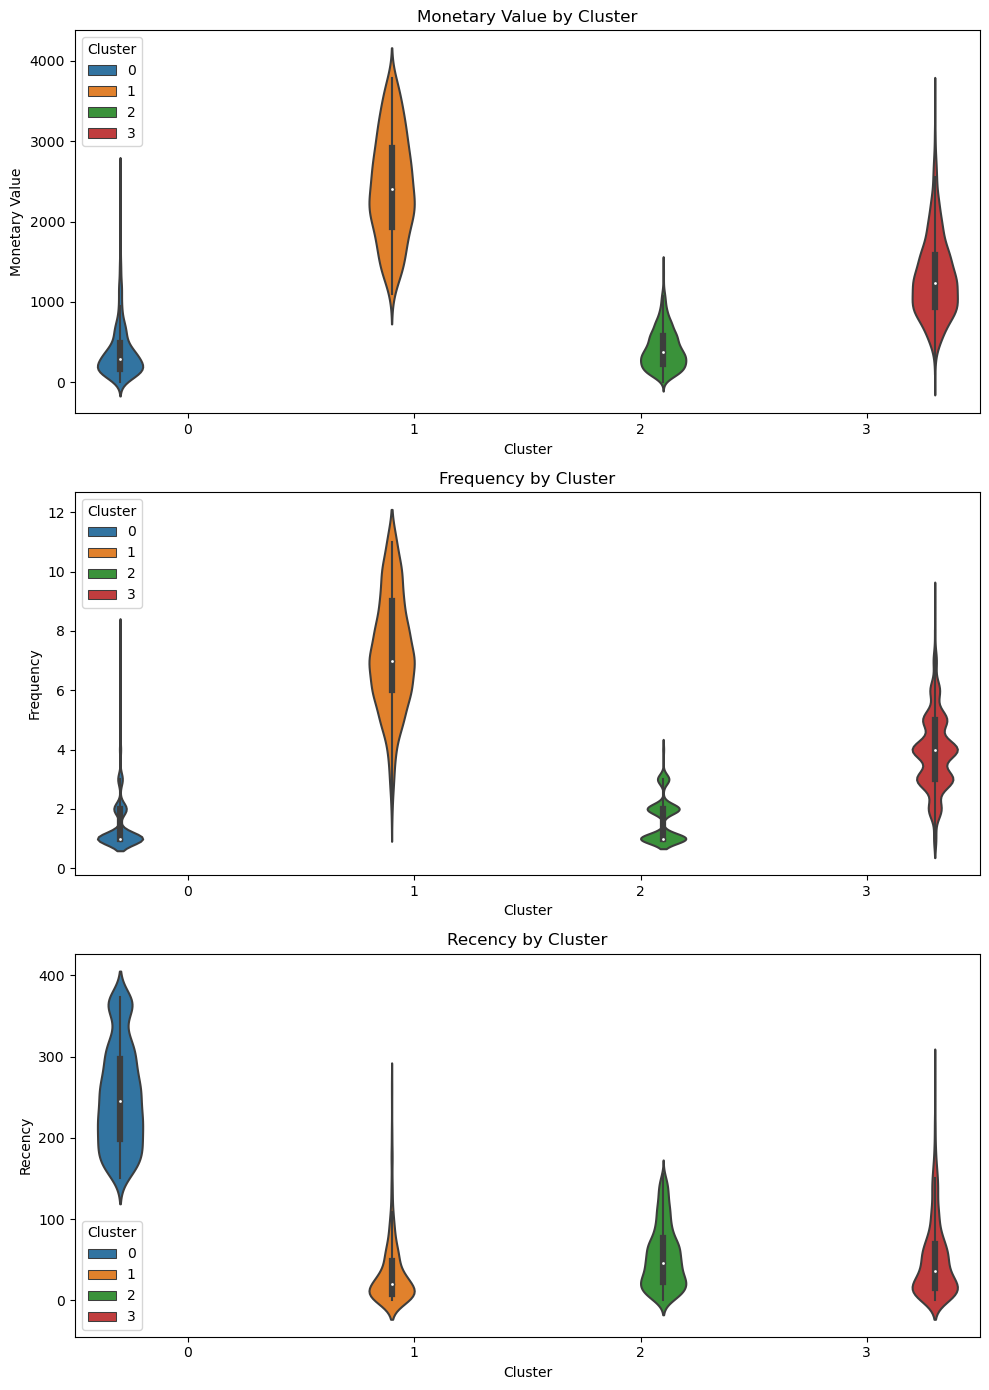

In [53]:
#checking various distributions across features

plt.figure(figsize=(10, 14))

plt.subplot(3, 1, 1)
sn.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["Cluster"])


plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sn.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])

plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sn.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])

plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

# Violin plot analysis
#Interperrting each cluster and relevant action to take
1. Cluster 0-Blue(At-Risk customers): Re-engage them
- Solution:Use re-engagement campaigns,share educational content about your products or industry to re-engage their interest.Use special discounts, or reminders to encourage them to return and purchase again.
- Reason:his group represents customers who are at high risk of churning or may have already churned.The group consists of less frequent, lower-value buyers who haven't made a purchase in a while. The goal should be to re-engage them and encourage a return to active buying.
  
2. Cluster 1-Orange (Best and most valuable customers): Reward them
- Solution: Introduce VIP and loyalty programs,assign dedicated account managers for personalized attention and give them rewards.
- Reason:This cluster represents high value customers who have purchased recently, buy often, and spend the most. The cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.
    
3. Cluster 2(Green): (Low-engagement customers)- Nurture them
- Solution:Concentrate on strengthening relationships, delivering exceptional customer service, and offering incentives to promote more frequent purchases
- Reason:This cluster represents low  active and low-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending
  
4. Cluster 3: Red (Potential loyalists)- Retain them

- Solution:Look for ways to keep them and improve their purchase frequency
- Reason:his cluster represents moderately high-value customers who purchase not really regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.

## Summary of Cluster names

- Cluster 0(Blue) : Re-engage
- Cluster 1(Orange) : Reward
- Cluster 2(Green) : Nurture
- Cluster 3(Red) : Retain


# Clustering the outliers
Most of the monetary value outliers are also frequency outliers, hence the monetary value outliers and frequency value outliers overlap.
So we form three new clusters
- Pure monetary outliers.
- Pure frequency outliers.
- Outliers that are both monetary and frequency outliers.


In [57]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index) # finding overlapping points between monetary and frequency outliers.

overlap_indices

Index([  65,   84,   85,   92,  126,  145,  164,  179,  202,  203,
       ...
       4107, 4125, 4143, 4156, 4200, 4235, 4236, 4237, 4241, 4262],
      dtype='int64', length=226)

In [58]:
#creating dataframes for each of the different clusters
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

# Manually assigning cluster labels to each of the clusters
monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

#combining three dataframes into one dataframe
outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.0,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.0,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.0,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.0,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.0,4145.52,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3


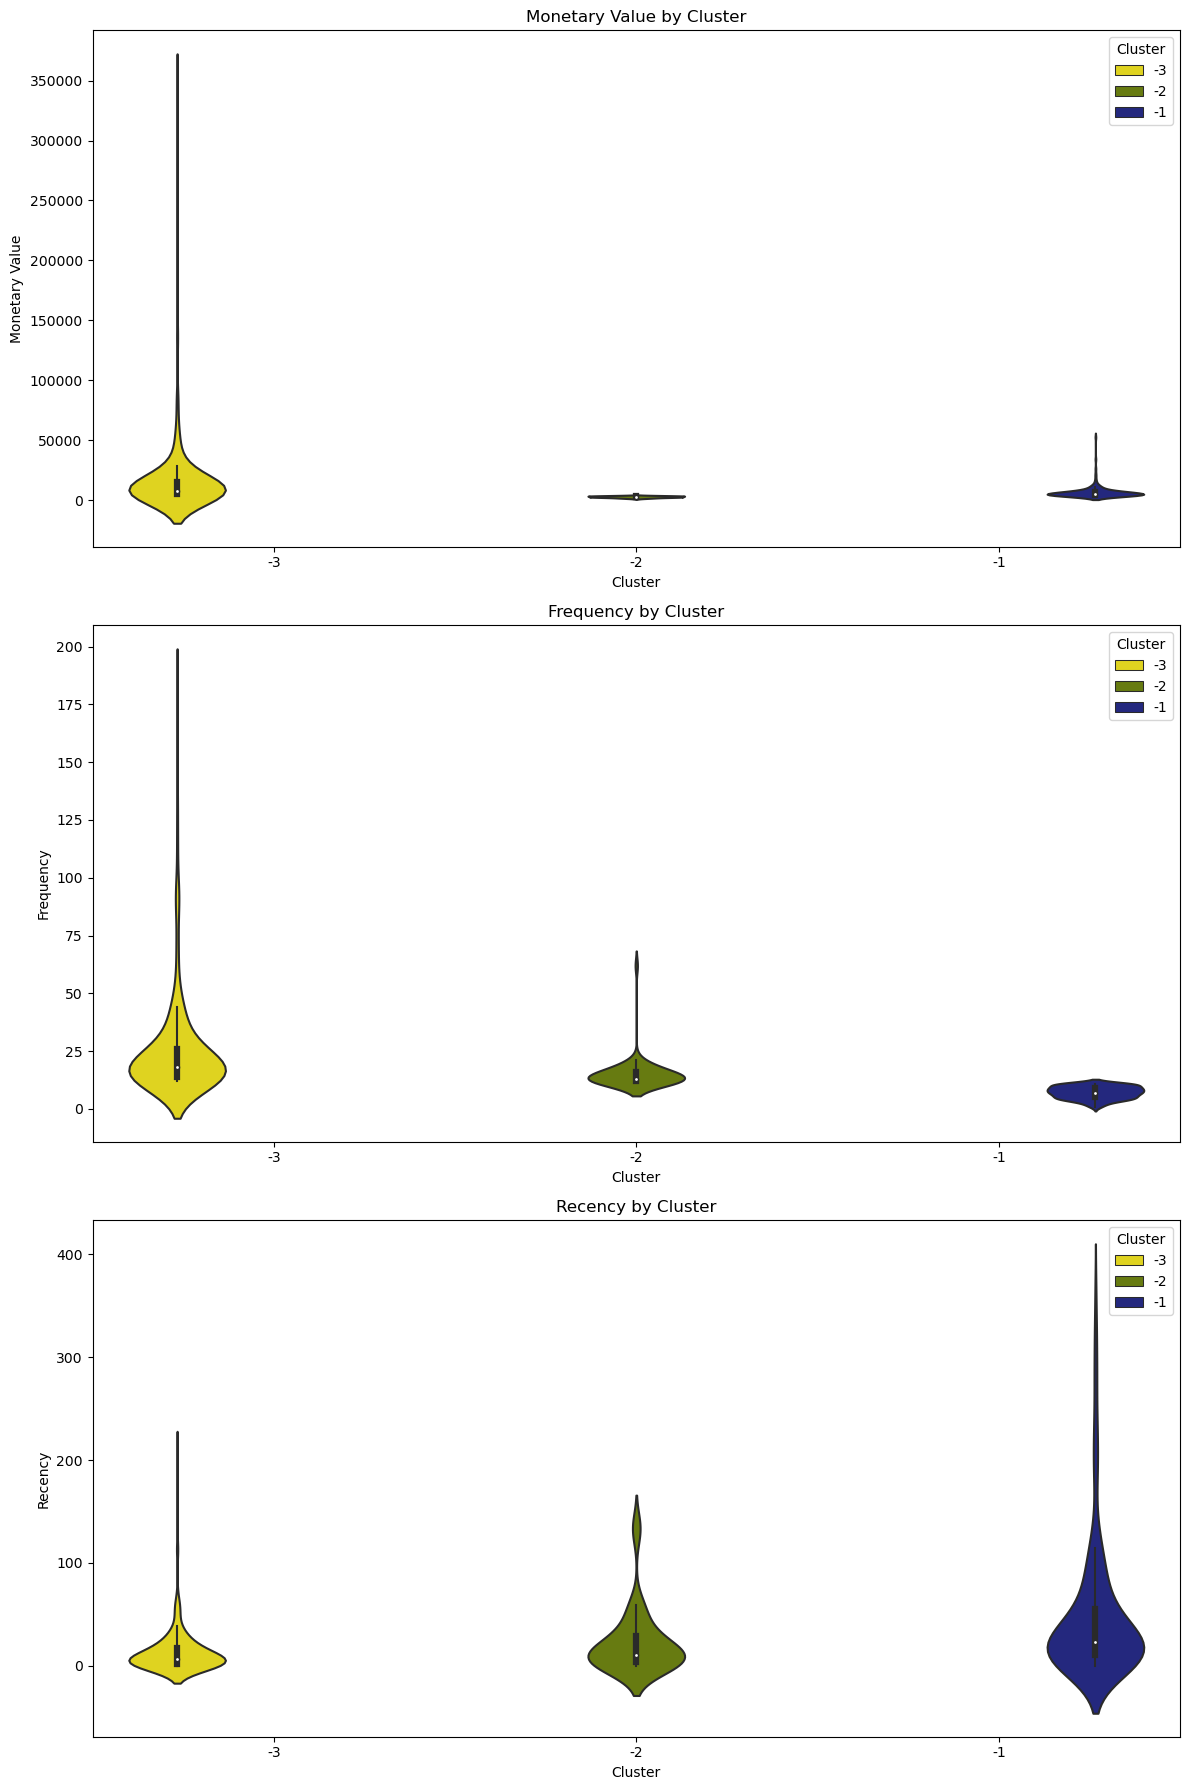

In [66]:
#Visualizing outlier data on a violin plot

cluster_colors = {-1: '#151B8D',
                  -2: '#728C00',
                  -3: '#FFEF00'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sn.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])

plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sn.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])

plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sn.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])

plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

# Violin plot analysis

Interpreting each cluster,and providing relevant action to take

1. Cluster -1(Monetary Outliers)PAMPER: Characteristics: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent. Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

2. Cluster -2(Frequency Outliers)Characteristics: Regular buyers who make smaller purchases with each transaction. These customers are highly engaged but present opportunities for upselling. Potential Strategy: Introduce loyalty programs or offer bundled packages to motivate them to spend more during their frequent visits.


3. Cluster -3(Monetary and frequency Outliers)DELIGHT: Characteristics: These are your highest-value customers, marked by both frequent purchases and substantial spending. They are likely your most important clientele and need dedicated attention. Potential Strategy: Create VIP programs or offer exclusive deals to keep them loyal and foster ongoing engagement.


In [78]:
#Adding cluster labels to our data
#creating a dictionary of cluster labels
cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [79]:
# joining outliers and non_outliers dataframe so we can get a full set of data, a mixture of our kmeans clusters and manually formed clusters.
fully_clustered_df = pd.concat([non_outliers_df, outlier_clusters_df])

fully_clustered_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,0
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,3
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,3
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4235,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3


In [80]:
#Adding cluster labels to the dataframe
fully_clustered_df["ClusterLabel"] = fully_clustered_df["Cluster"].map(cluster_labels)

fully_clustered_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.0,169.36,2,2010-06-28 13:53:00,164,0,RETAIN
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,3,REWARD
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2,NURTURE
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,3,REWARD
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2,NURTURE
...,...,...,...,...,...,...,...
4235,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3,DELIGHT
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3,DELIGHT
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3,DELIGHT
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3,DELIGHT


# Visualizing all cluster results to summarize our findings


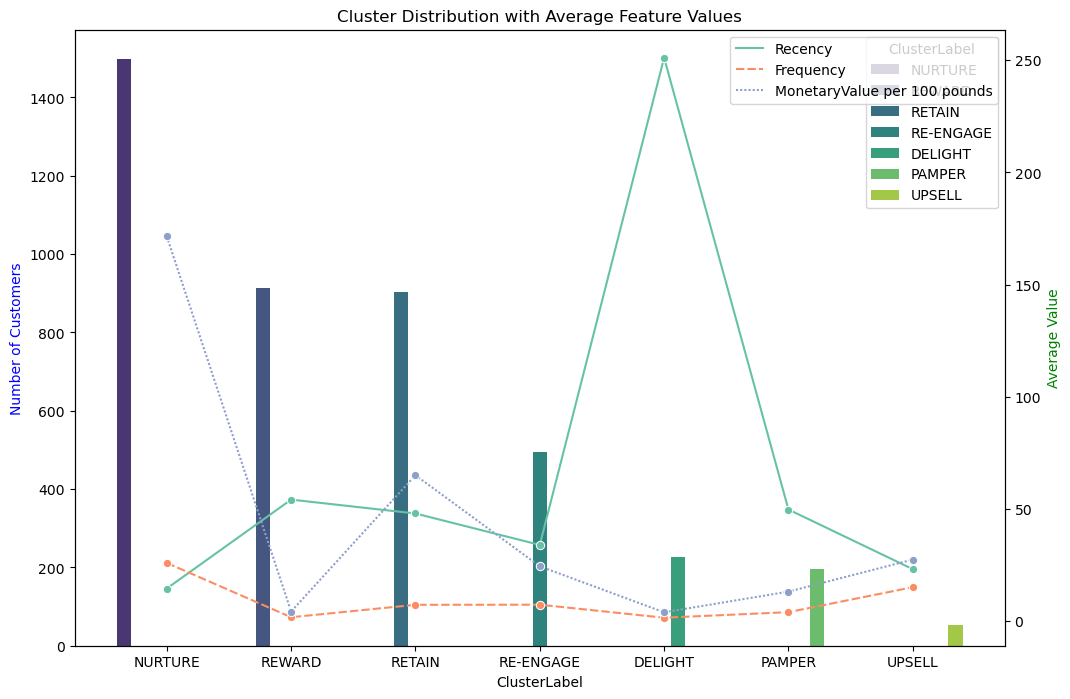

In [84]:
#Volume per cluster
cluster_counts = fully_clustered_df['ClusterLabel'].value_counts() 
fully_clustered_df["MonetaryValue per 100 pounds"] = fully_clustered_df["MonetaryValue"] / 100.00
feature_means = fully_clustered_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean() #getting average values of each of our features

fig, ax1 = plt.subplots(figsize=(12, 8))

sn.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sn.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o') #using line plot to represent feature means
ax2.set_ylabel('Average Value', color='g')
plt.tight_layout
plt.show()